<a href="https://colab.research.google.com/github/gustavoac07/analises_de_dados/blob/main/mc_relatorio_final_est.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando biblioteca
import pandas as pd

# Carregando os dados
dados_publicidade_inicial = pd.read_csv('/content/Gastos_Publicidade_MelhoresCompras.csv')



In [2]:
# Consultando as primeiras linhas para verificar o conteúdo
dados_publicidade_inicial.head()

,Ano,Mes,Tipo de Midia,Gastos com Publicidade (em R$),Previsao Inicial de Aumento de Vendas (em mil unidades)
0,2022,1,Paginas web,87000,1000
1,2022,1,Redes sociais,120000,800
2,2022,1,TV,250000,1500
3,2022,1,Jornal,110000,730
4,2022,1,Revista,40000,360


In [3]:
# Verificando informações dos dados
dados_publicidade_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Ano                                                      200 non-null    int64 
 1   Mes                                                      200 non-null    int64 
 2   Tipo de Midia                                            200 non-null    object
 3   Gastos com Publicidade (em R$)                           200 non-null    object
 4   Previsao Inicial de Aumento de Vendas (em mil unidades)  200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


Acima observamos a consulta do tipo do dado de cada coluna. Observamos que dados que deveriam ser númericos estão em tipo object (texto). Devemos alterar para realizar as analises estatisticas.

In [4]:
# Criando as variáveis dummy e realizando conversão para inteiro
dados_publicidade_dummies = pd.get_dummies(dados_publicidade_inicial['Tipo de Midia'], prefix='Tipo de Midia')
dados_publicidade_dummies = dados_publicidade_dummies.astype(int)

Utilizamos variável dummy para transformar os tipos object em (a principio) em bool True e False. Em seguida transformar em número inteiro (0 ou 1) para trabalhar da melhor maneira os modelos estatisticos.

In [5]:
# Verificando novamente as informações dos dados com os dados convertidos
dados_publicidade_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Tipo de Midia_Google         200 non-null    int64
 1   Tipo de Midia_Instagram      200 non-null    int64
 2   Tipo de Midia_Jornal         200 non-null    int64
 3   Tipo de Midia_Paginas web    200 non-null    int64
 4   Tipo de Midia_Radio          200 non-null    int64
 5   Tipo de Midia_Redes sociais  200 non-null    int64
 6   Tipo de Midia_Revista        200 non-null    int64
 7   Tipo de Midia_TV             200 non-null    int64
dtypes: int64(8)
memory usage: 12.6 KB


Para a melhor organização criamos um novo dataframe chamado dados_publicidade_dummies para identificar melhor a transformação. Observamos que a coluna Tipo de Midia está todos em tipo inteiro (0 ou 1).


In [6]:
# consulta dos dados original
dados_publicidade_inicial.head()

,Ano,Mes,Tipo de Midia,Gastos com Publicidade (em R$),Previsao Inicial de Aumento de Vendas (em mil unidades)
0,2022,1,Paginas web,87000,1000
1,2022,1,Redes sociais,120000,800
2,2022,1,TV,250000,1500
3,2022,1,Jornal,110000,730
4,2022,1,Revista,40000,360


In [7]:
# Juntando as colunas dummy aos dados original
dados_publicidade = pd.concat([dados_publicidade_inicial, dados_publicidade_dummies], axis=1)

Para realizar as analises de forma completa realizamos a junção das tabelas dados_publicidade_inicial e dados_publicidade_dummies

In [8]:
# Novamente consultando a tabela com os dados anexados
dados_publicidade.head()

,Ano,Mes,Tipo de Midia,Gastos com Publicidade (em R$),Previsao Inicial de Aumento de Vendas (em mil unidades),Tipo de Midia_Google,Tipo de Midia_Instagram,Tipo de Midia_Jornal,Tipo de Midia_Paginas web,Tipo de Midia_Radio,Tipo de Midia_Redes sociais,Tipo de Midia_Revista,Tipo de Midia_TV
0,2022,1,Paginas web,87000,1000,0,0,0,1,0,0,0,0
1,2022,1,Redes sociais,120000,800,0,0,0,0,0,1,0,0
2,2022,1,TV,250000,1500,0,0,0,0,0,0,0,1
3,2022,1,Jornal,110000,730,0,0,1,0,0,0,0,0
4,2022,1,Revista,40000,360,0,0,0,0,0,0,1,0


Consultamos o novo data frame e observamos os tipos de midia já em 0 e 1, variaveis dummy.

In [9]:
# Removeno o símbolo de moeda 'R$', espaços em branco e substitui vírgulas por pontos
dados_publicidade_inicial['Gastos com Publicidade (em R$)'] = dados_publicidade_inicial['Gastos com Publicidade (em R$)'].str.replace('R$', '', regex=False)
dados_publicidade_inicial['Gastos com Publicidade (em R$)'] = dados_publicidade_inicial['Gastos com Publicidade (em R$)'].str.replace('.', '', regex=False)
dados_publicidade_inicial['Gastos com Publicidade (em R$)'] = dados_publicidade_inicial['Gastos com Publicidade (em R$)'].str.replace(',', '.', regex=False)

# Convertendo a coluna para tipo numérico (float)
dados_publicidade_inicial['Gastos com Publicidade (em R$)'] = pd.to_numeric(dados_publicidade_inicial['Gastos com Publicidade (em R$)'], errors='coerce')

Continuando nas normalizações dos dados, observamos a coluna Gastos com Publicidade (em R$) está em tipo object (texto) essa transformação faz parte do processo para realizar os modelos estatisticos.

In [10]:
# Função para converter colunas com possíveis caracteres não numéricos
def converter_coluna_para_float(coluna):
    return pd.to_numeric(coluna.replace({'R\$': '', ',': '.'}, regex=True), errors='coerce')

# Converter todas as colunas numéricas que podem ter problemas
colunas_numericas = ['Gastos com Publicidade (em R$)']
for coluna in colunas_numericas:
    dados_publicidade[coluna] = converter_coluna_para_float(dados_publicidade[coluna])

# Consultando se há valores ausentes após a conversão
print(dados_publicidade.isnull().sum())


Ano                                                        0
Mes                                                        0
Tipo de Midia                                              0
Gastos com Publicidade (em R$)                             0
Previsao Inicial de Aumento de Vendas (em mil unidades)    0
Tipo de Midia_Google                                       0
Tipo de Midia_Instagram                                    0
Tipo de Midia_Jornal                                       0
Tipo de Midia_Paginas web                                  0
Tipo de Midia_Radio                                        0
Tipo de Midia_Redes sociais                                0
Tipo de Midia_Revista                                      0
Tipo de Midia_TV                                           0
dtype: int64


Realizamos normalizações as colunas para garantir que estejam no tipo float e realizamos o print que o resultado observamos que em nenhuma das coluans existe dados em nulo, após as normalizações.

In [11]:
#Realizando a consulta novamente dos dados
dados_publicidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Ano                                                      200 non-null    int64  
 1   Mes                                                      200 non-null    int64  
 2   Tipo de Midia                                            200 non-null    object 
 3   Gastos com Publicidade (em R$)                           200 non-null    float64
 4   Previsao Inicial de Aumento de Vendas (em mil unidades)  200 non-null    int64  
 5   Tipo de Midia_Google                                     200 non-null    int64  
 6   Tipo de Midia_Instagram                                  200 non-null    int64  
 7   Tipo de Midia_Jornal                                     200 non-null    int64  
 8   Tipo de Midia_Paginas web     

Realizando a ultima consulta do dos tipos das colunas, podemos observar que todas as coluans estão normalizadas, tratadas e prontas para darmos continuidade nas analises para a equipe do Marketing da Melhores Compras.

# **Parte Gráfica**

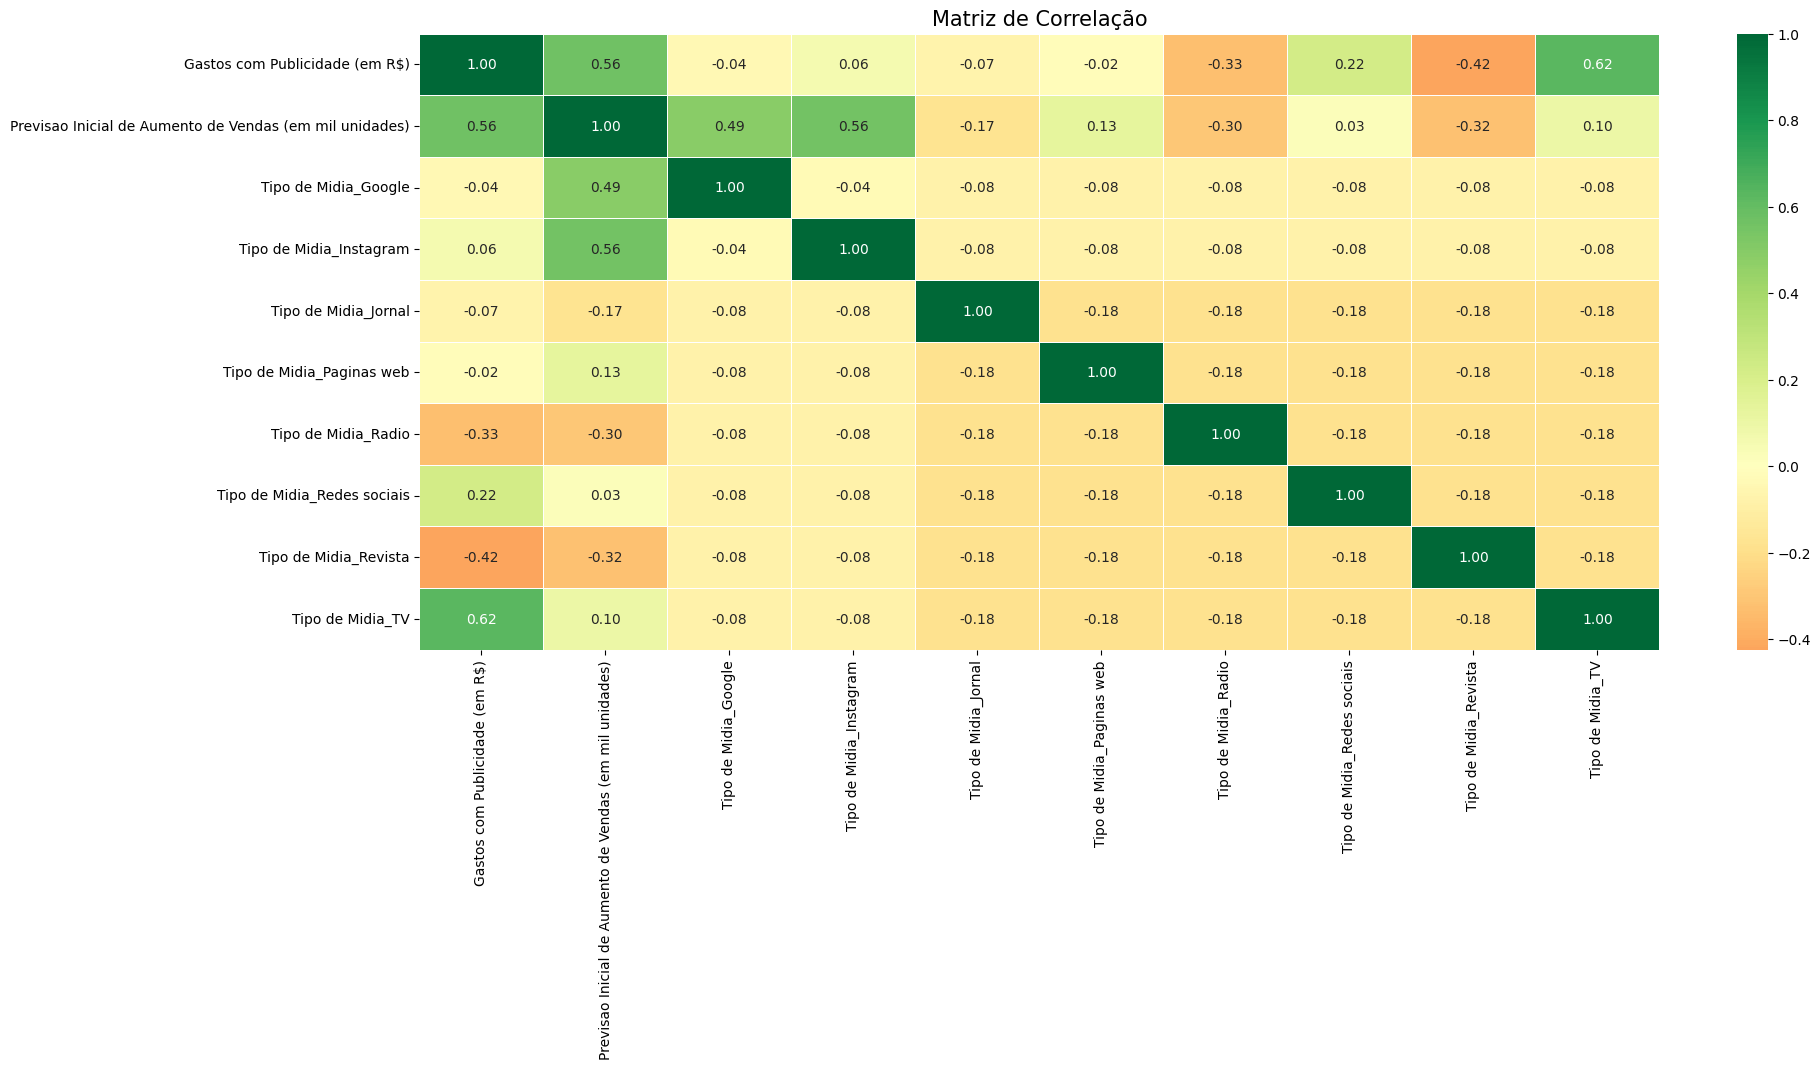

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionando apenas colunas numéricas
dados_numericos = dados_publicidade.select_dtypes(include=['int64', 'float64'])

# Excluir as colunas 'Ano' e 'Mes' da análise
dados_numericos = dados_numericos.drop(columns=['Ano', 'Mes'], errors='ignore')

# Criando a matriz de correlação
correlacao = dados_numericos.corr()

# Criando o mapa de calor
plt.figure(figsize=(20, 8))
sns.heatmap(correlacao, annot=True, cmap="RdYlGn", fmt='.2f', center=0, linewidths=0.5)
plt.title('Matriz de Correlação', size=15)
plt.show()

Matriz de correlação é uma ferramenta estatística que mostra a relação linear entre pares de variáveis. Os valores dentro da matriz variam de -1 a 1, indicando a força e a direção da relação:

1: Correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta).
-1: Correlação negativa perfeita (quando uma variável aumenta, a outra diminui).
0: Não há correlação linear entre as variáveis.

**Interpretando a Matriz**

Gastos com Publicidade e Previsão de Aumento de Vendas: A correlação é positiva e moderadamente forte (0,56). Isso sugere que, à medida que os gastos com publicidade aumentam, há uma tendência de aumento nas vendas.
Gastos com Publicidade e Tipo de Mídia: As correlações com os diferentes tipos de mídia são mais fracas e algumas até negativas. Isso indica que o tipo de mídia utilizado, isoladamente, não explica grande parte da variação nos gastos com publicidade.
Previsão de Aumento de Vendas e Tipo de Mídia: As correlações com a previsão de aumento de vendas são variadas. **Algumas mídias, como Google e Instagram, apresentam correlações positivas, sugerindo que investir nessas mídias pode levar a um maior aumento nas vendas.**

# **Analises Estatistica**

In [13]:
# Importando as bibliotecas para realizar o modelo estatístico:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

# utilizando os dados da tabela 'dados_publicidade' já pronto e normalizado
X = dados_publicidade[['Tipo de Midia_Google', 'Tipo de Midia_Instagram', 'Tipo de Midia_Jornal',
                      'Tipo de Midia_Paginas web', 'Tipo de Midia_Radio', 'Tipo de Midia_Redes sociais',
                      'Tipo de Midia_Revista', 'Tipo de Midia_TV', 'Gastos com Publicidade (em R$)']]
y = dados_publicidade['Previsao Inicial de Aumento de Vendas (em mil unidades)']

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test)

# Adicionando uma constante para o intercepto
X = sm.add_constant(X)

# Dividindo os dados para o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construindo o modelo de regressão linear
modelo_sm = sm.OLS(y_test, X_test).fit()

# consultando o resumo estatístico do modelo
print(modelo_sm.summary())


                                               OLS Regression Results                                              
Dep. Variable:     Previsao Inicial de Aumento de Vendas (em mil unidades)   R-squared:                       0.971
Model:                                                                 OLS   Adj. R-squared:                  0.964
Method:                                                      Least Squares   F-statistic:                     130.9
Date:                                                     Tue, 10 Sep 2024   Prob (F-statistic):           1.06e-21
Time:                                                             02:48:21   Log-Likelihood:                -263.15
No. Observations:                                                       40   AIC:                             544.3
Df Residuals:                                                           31   BIC:                             559.5
Df Model:                                                               

**R-squared (R²):** O valor de 0.971 indica que 97.1% da variação na variável dependente, "Previsão Inicial de Aumento de Vendas (em mil unidades)", é explicada pelo modelo. Isso é um ótimo valor, sugerindo que o modelo está ajustado aos dados de forma eficaz.

**Os coeficientes indicam a magnitude e a direção da relação entre cada variável independente e a variável dependente:**

* Tipo de Midia_Google (coef = 2459.3312, p < 0.001): Um aumento de 1 unidade no investimento em mídia do Google está associado a um aumento de aproximadamente 2459 mil unidades nas vendas previstas, assumindo que as outras variáveis permanecem constantes. O p-valor é extremamente significativo, indicando que esta variável é um preditor importante.

* Tipo de Midia_Instagram (coef = 2422.3640, p < 0.001): O investimento em Instagram também tem um impacto positivo significativo nas vendas, semelhante ao Google.

* Tipo de Midia_Jornal (coef = -839.3771, p < 0.001): Curiosamente, o investimento em Jornal tem um coeficiente negativo, sugerindo que, para cada aumento na unidade de gasto, há uma diminuição prevista de 839 mil unidades nas vendas. Este coeficiente também é altamente significativo.

* Outras mídias: Todas as outras mídias, como "Rádio", "Revista", "TV", e "Redes sociais", têm coeficientes negativos, indicando que o aumento do investimento nessas mídias está associado a uma diminuição nas vendas previstas. Todos esses coeficientes são estatisticamente significativos.

* Gastos com Publicidade (em R$) (coef = 0.0103, p < 0.001): Cada aumento de 1 real no gasto com publicidade está associado a um aumento de aproximadamente 0.0103 mil unidades nas vendas previstas, o que também é altamente significativo.

Os valores-p no modelo indicam que todas as variáveis independentes têm um impacto estatisticamente significativo nas vendas previstas. Isso é um sinal positivo para a qualidade do modelo.

Interpretação do Valor-p
O valor-p mede a probabilidade de observar os dados coletados (ou algo mais extremo) sob a hipótese nula de que o coeficiente de uma variável independente é igual a zero (ou seja, a variável não tem efeito sobre a variável dependente).

Especificamente:
Tipo de Midia_Google, Tipo de Midia_Instagram, Tipo de Midia_Jornal, etc.: Todos têm valores-p de praticamente 0.000, o que significa que essas variáveis são altamente significativas e, portanto, têm uma influência clara e distinta sobre as vendas previstas.

Gastos com Publicidade (em R$): Também tem um valor-p muito baixo, indicando que os gastos totais em publicidade têm um efeito estatisticamente significativo nas vendas previstas.

O que os Valores-p Significam para o Modelo:
Significância das Variáveis: Como todos os valores-p são inferiores a 0.05, todas as variáveis independentes incluídas no modelo são estatisticamente significativas. Isso fortalece a confiança de que as variáveis selecionadas são relevantes para prever o aumento de vendas.

# **Gráfico de Dispersão**

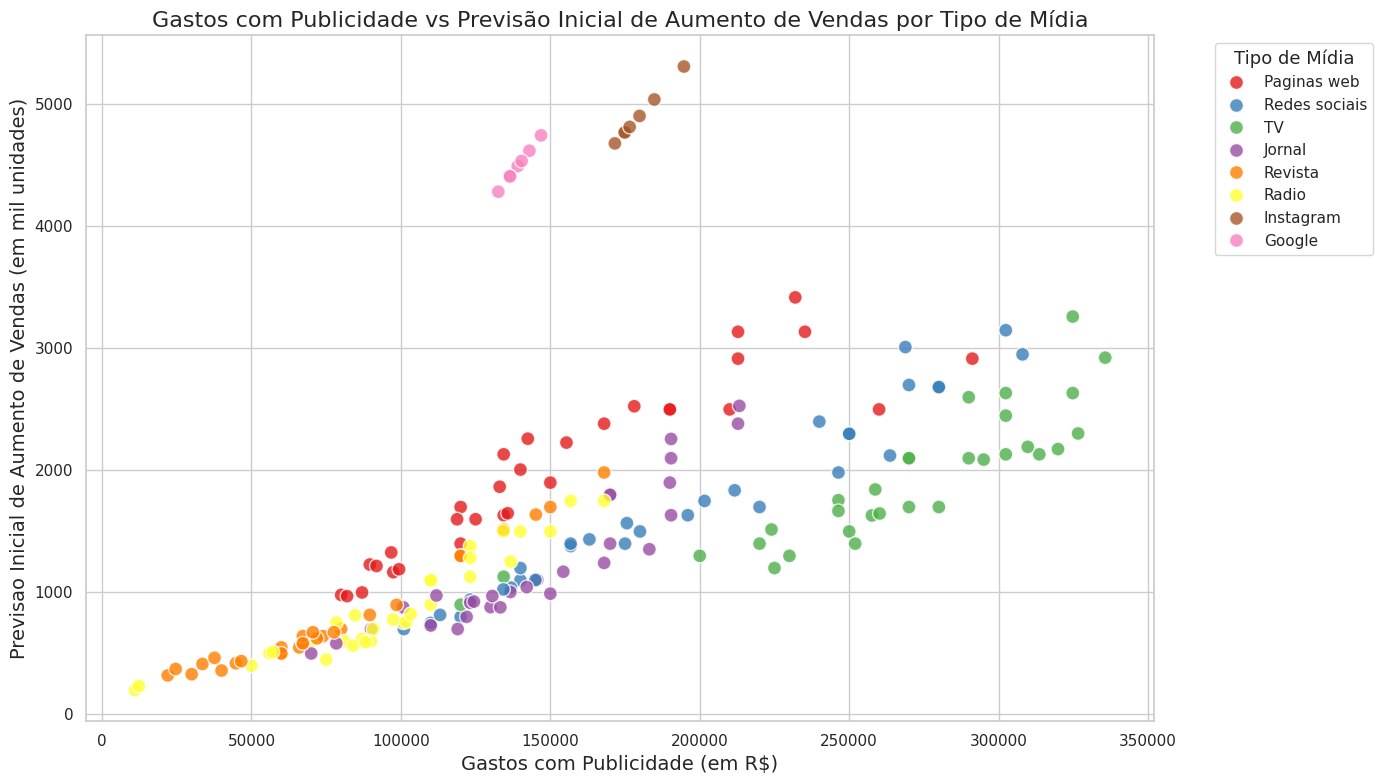

In [14]:
# Carregando bibliotecas gráficas
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de dispersão
plt.figure(figsize=(14, 8))

# Gráfico de dispersão
sns.scatterplot(x="Gastos com Publicidade (em R$)",
                y="Previsao Inicial de Aumento de Vendas (em mil unidades)",
                hue="Tipo de Midia",
                data=dados_publicidade,
                palette='Set1',  # Alterando a paleta de cores para 'Set1'
                s=100,
                alpha=0.8,
                edgecolor="w",
                linewidth=1)

# Layout
plt.title('Gastos com Publicidade vs Previsão Inicial de Aumento de Vendas por Tipo de Mídia', fontsize=16)
plt.xlabel('Gastos com Publicidade (em R$)', fontsize=14)
plt.ylabel('Previsao Inicial de Aumento de Vendas (em mil unidades)', fontsize=14)
plt.legend(title='Tipo de Mídia', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')

# Visualizando o gráfico
plt.tight_layout()
plt.show()


* Insights: O gráfico confirma visualmente as conclusões obtidas a partir da análise da tabela. Por exemplo, se a tabela indica que o coeficiente para o Google é positivo e altamente significativo, o gráfico mostrar uma tendência de aumento nas previsões de vendas à medida que os gastos com publicidade no Google aumentam, assim como na do Instagram.
* Tipos de Mídia: os dois se destacam e claramente mostra que menor investimentos, comparados aos outros, traz resultados melhores, conforme, o modelo estatistico.
* O modelo estatistico demonstra outros tipos de mídia por meio dos coeficientes que são negativos, quanto o investido, menor é o retorno.

O gráfico é uma ferramenta poderosa para comunicar os resultados da análise para um público mais amplo, pois as informações visuais são mais facilmente compreendidas.


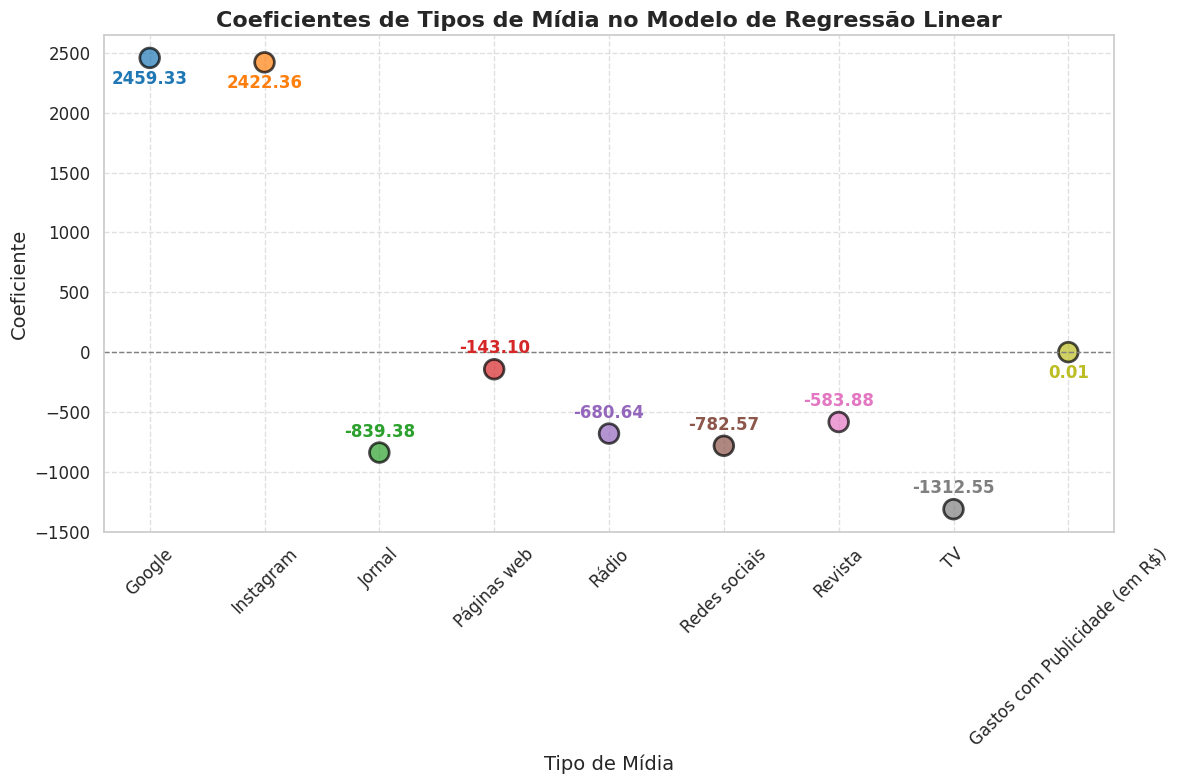

In [15]:
# Trazendo os coeficientes diretamente do modelo
coeficientes = modelo_sm.params[1:]

# Adicionando o nome do coeficiente para os gastos com publicidade
midias = ['Google', 'Instagram', 'Jornal', 'Páginas web', 'Rádio', 'Redes sociais', 'Revista', 'TV', 'Gastos com Publicidade (em R$)']

# Cores para cada mídia
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

# Tamanhos dos marcadores
sizes = [200] * len(midias)

# Criando o gráfico de dispersão
plt.figure(figsize=(12, 8))
plt.scatter(midias, coeficientes, s=sizes, c=colors, alpha=0.7, edgecolors='black', linewidth=2)

# Adicionando linha horizontal no zero para visualização dos coeficientes positivos e negativos
plt.axhline(0, color='grey', linestyle='--', linewidth=1)

# Adicionando títulos e rótulos
plt.title('Coeficientes de Tipos de Mídia no Modelo de Regressão Linear', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Mídia', fontsize=14)
plt.ylabel('Coeficiente', fontsize=14)

# Adicionando os valores dos coeficientes no gráfico, ajustando para cima ou para baixo dos pontos
for i, coef in enumerate(coeficientes):
    offset = -100 if coef > 0 else 100  # Ajuste a posição para baixo se positivo, e para cima se negativo
    plt.text(midias[i], coef + offset, f'{coef:.2f}', ha='center', va='top' if coef > 0 else 'bottom',
             fontsize=12, fontweight='bold', color=colors[i])

# Melhorando a exibição dos rótulos
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adicionando grade
plt.grid(True, linestyle='--', alpha=0.6)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


Analisando o Gráfico de Coeficientes de Tipos de Mídia
O que o gráfico mostra:

O gráfico apresenta os coeficientes de diferentes tipos de mídia em um modelo de regressão linear. Cada ponto representa um tipo de mídia (Google, Instagram, Jornal, etc) e sua posição vertical indica o impacto que esse tipo de mídia tem sobre a variável que você está tentando prever (resultado de marketing para as vendas).

Interpretando os coeficientes:

**Coeficientes Positivos:**

* **Google e Instagram:** Os coeficientes positivos e altos para Google e Instagram indicam que, ao aumentar o investimento em publicidade nesses canais, você pode esperar um aumento significativo na variável que você está tentando prever. Isso sugere que esses são canais muito eficazes para sua campanha.

**Coeficientes Negativos:**

* **Jornal, Páginas Web, Rádio, Redes Sociais, Revista e TV:** Os coeficientes negativos indicam que, ao aumentar o investimento em publicidade nesses canais, você pode esperar uma diminuição na variável que você está tentando prever. Isso pode ser contraintuitivo, mas pode indicar que esses canais não são tão eficazes para sua campanha ou que há outras variáveis em jogo que estão influenciando os resultados.


**Coeficiente Próximo a Zero:**
* **Gastos com Publicidade (em R$):** O coeficiente muito próximo a zero para os gastos com publicidade em geral sugere que o aumento total dos gastos com publicidade não tem um impacto significativo na variável que você está tentando prever. Isso pode indicar que a alocação dos gastos entre os diferentes canais é mais importante do que o valor total gasto.

**Conclusões:**

Com base no gráfico, podemos concluir que:

Google e Instagram são os canais mais eficazes para a campanha, pois estão fortemente associados a um aumento na variável que você estamos tentando prever.
Jornal, Páginas Web, Rádio, Redes Sociais, Revista e TV podem não ser tão eficazes ou podem estar tendo um efeito negativo na campanha.
A alocação dos gastos com publicidade entre os diferentes canais é mais importante do que o valor total gasto.